In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)
print(tf.__version__)

2.6.0


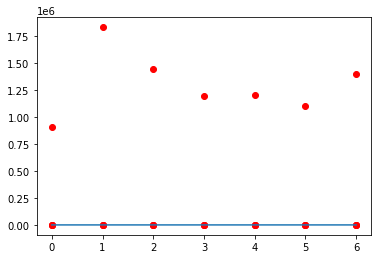

In [26]:
xy= np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
              [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
              [819.929993, 824.400024, 1438100,818.48999, 819.23999],
              [819.359985,823,1188100,818.469971,818.97998],
              [819,823,1198100,816,820.450012],
              [811.700012, 815.25,1098100,809.780029,813.669983],
              [809.51001,816.659973,1398100,804.539978,809.559998]])
x_train=xy[:,0:-1]
y_train=xy[:,[-1]]

plt.plot(x_train,'ro')
plt.plot(y_train)
plt.show()

In [4]:
dataset= tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [5]:
W= tf.Variable(tf.random.normal((4,1)), dtype=tf.float32)
b= tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

In [6]:
def linearReg_fn(features):
  hypothesis=tf.matmul(features,W)+b
  return hypothesis

In [21]:
def loss_fn(hypothesis, features, labels):
  cost= tf.reduce_mean(tf.square(hypothesis-labels))
  return cost

In [22]:
optimizer= tf.keras.optimizers.SGD(learning_rate=1e-5)

def grad(hypothesis, features, labels):
  with tf.GradientTape() as tape:
    loss_value=loss_fn(linearReg_fn(features),features,labels)
  return tape.gradient(loss_value, [W,b]), loss_value

In [23]:
EPOCHS =101

for step in range(EPOCHS):
  for features, labels in dataset:
    features =tf.cast(features, tf.float32)
    labels =tf.cast(labels, tf.float32)
    hypo_value= linearReg_fn(features)
    grads, loss_value =grad(linearReg_fn(features),features, labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
  print("iter:{}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))

iter:0, Loss: 703034812906078208.0000, Prediction: [[-5.7575789e+08]
 [-1.1590607e+09]
 [-9.1179098e+08]
 [-7.5328480e+08]
 [-7.5962509e+08]
 [-6.9622259e+08]
 [-8.8643002e+08]]
iter:1, Loss: 860131726013330872749851240562688.0000, Prediction: [[2.0138848e+16]
 [4.0541566e+16]
 [3.1892587e+16]
 [2.6348370e+16]
 [2.6570139e+16]
 [2.4352452e+16]
 [3.1005513e+16]]
iter:2, Loss: inf, Prediction: [[-7.04415007e+23]
 [-1.41805987e+24]
 [-1.11553644e+24]
 [-9.21611223e+23]
 [-9.29368223e+23]
 [-8.51798151e+23]
 [-1.08450837e+24]]
iter:3, Loss: inf, Prediction: [[2.4638974e+31]
 [4.9600785e+31]
 [3.9019147e+31]
 [3.2236046e+31]
 [3.2507370e+31]
 [2.9794127e+31]
 [3.7933848e+31]]
iter:4, Loss: inf, Prediction: [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
iter:5, Loss: inf, Prediction: [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
iter:6, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
iter:7, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [na

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

tf.random.set_seed(777)

print(tf.__version__)

2.6.0


In [25]:
def normalization(data):
  numerator= data-np.min(data,0)
  denominator= np.max(data, 0)-np.min(data,0)
  return numerator/ denominator

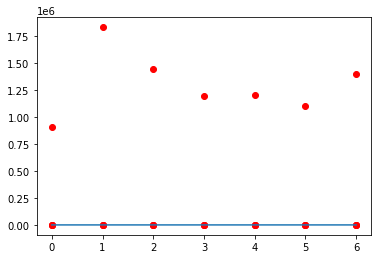

In [27]:
xy= np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
              [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
              [819.929993, 824.400024, 1438100,818.48999, 819.23999],
              [819.359985,823,1188100,818.469971,818.97998],
              [819,823,1198100,816,820.450012],
              [811.700012, 815.25,1098100,809.780029,813.669983],
              [809.51001,816.659973,1398100,804.539978,809.559998]])
x_train=xy[:,0:-1]
y_train=xy[:,[-1]]

plt.plot(x_train,'ro')
plt.plot(y_train)
plt.show()

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.58588884 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


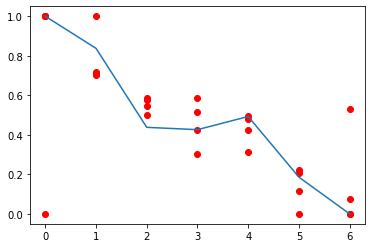

In [60]:
xy=normalization(xy)
print(xy)
x_train=xy[:, 0:-1]
y_train=xy[:, [-1]]

plt.plot(x_train,'ro')
plt.plot(y_train)

plt.show()

In [68]:
dataset= tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [69]:
W= tf.Variable(tf.random.normal((4,1)),dtype=tf.float32)
b= tf.Variable(tf.random.normal((1,)),dtype=tf.float32)

In [70]:
def linearReg_fn(features):
  hypothesis= tf.matmul(features, W) +b
  return hypothesis

In [71]:
def l2_loss(loss, beta=0.01):
  W_reg=tf.nn.l2_loss(W)
  loss=tf.reduce_mean(loss + W_reg * beta)
  return loss

In [72]:
def loss_fn(hypothesis, features, labels, flag=False):
  cost= tf.reduce_mean(tf.square(hypothesis-labels))
  if(flag):
    cost=l2_loss(cost)
  return cost

In [76]:
is_decay=True
starter_learning_rate=0.1

if(is_decay):
  learning_rate= tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                decay_steps=50,
                                                                decay_rate=0.96,
                                                                staircase=True)
  optimizer=tf.keras.optimizers.SGD(learning_rate)
else:
  optimizer=tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
  with tf.GradientTape() as tape:
    loss_value=loss_fn(linearReg_fn(features),features,labels, l2_flag)
  return tape.gradient(loss_value,[W,b]),loss_value

In [77]:
EPOCHS=101
for step in range(EPOCHS):
  for features, labels in dataset:
    features=tf.cast(features, tf.float32)
    labels=tf.cast(labels, tf.float32)
    grads,loss_value= grad(linearReg_fn(features),features, labels, False)
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
  if step %10==0:
    print("iter:{}, Loss:{:.4f}".format(step, loss_value))

iter:0, Loss:3.8225
iter:10, Loss:0.0515
iter:20, Loss:0.0388
iter:30, Loss:0.0304
iter:40, Loss:0.0245
iter:50, Loss:0.0203
iter:60, Loss:0.0173
iter:70, Loss:0.0150
iter:80, Loss:0.0133
iter:90, Loss:0.0120
iter:100, Loss:0.0110
